## Sagnac Frequency - Backscatter Correction - Join Files

## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read, Trace, Stream
from scipy.signal import hilbert

from functions.get_fft import __get_fft
from functions.multitaper_psd import __multitaper_psd
from functions.welch_psd import __welch_psd
from andbro__read_sds import __read_sds
from andbro__readYaml import __readYaml

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [4]:
config = {}

config['ring'] = "U"

config['seed'] = "BW.DROMY..FJU"

config['path_to_sds'] = archive_path+"romy_archive/"

config['tbeg'] = UTCDateTime("2024-03-01 00:00")
config['tend'] = UTCDateTime("2024-03-31 12:00")

## path to Sagnac data
config['path_to_autodata'] = archive_path+f"romy_autodata/"

config['path_to_data'] = data_path+"sagnac_frequency/data/backscatter/"

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

## Configurations

In [37]:
def __load_backscatter_data0(tbeg, tend, ring, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)-86400).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(dat)
        dat_str = str(dat)[:10].replace("-","")
        file = f"FJ{ring}_{dat_str}_backscatter.pkl"

        if not os.path.isfile(path_to_data+file):
            _path = data_path+"sagnac_frequency/data/"

            out = DataFrame()
            for m in range(24):
                hour = str(m).rjust(2, '0')+":00:00"
                filename = f"FJU_{dat_str}_{hour}_backscatter.pkl"
                try:
                    _df = read_pickle(_path+filename)
                    out = concat([out, _df])
                except:
                    print(f" -> failed: {_path}{filename}")
                    continue

            if not out.empty:
                print(f" -> write to: {_path}backscatter/FJU_{dat_str}_backscatter.pkl")
                out.to_pickle(f"{_path}backscatter/FJU_{dat_str}_backscatter.pkl")
            else:
                continue

        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    df.reset_index(inplace=True)

    return df

In [38]:
bs = __load_backscatter_data0(config['tbeg'], config['tend'], config['ring'], config['path_to_data'])

2023-11-25 00:00:00
2023-11-26 00:00:00


In [14]:
from andbro__querrySeismoData import __querrySeismoData
repo = "online"
stx, invx = __querrySeismoData(
                                seed_id="GR.WET..HHZ",
                                starttime=UTCDateTime("2024-03-30 00:00"),
                                endtime=UTCDateTime("2024-03-30 06:00"),
                                repository=repo,
                                path=None,
                                restitute=False,
                                detail=None,
                                fill_value=None,
                            )

In [15]:
stx.remove_response(invx)

1 Trace(s) in Stream:
GR.WET..HHZ | 2024-03-30T00:00:00.000000Z - 2024-03-30T06:00:00.000000Z | 100.0 Hz, 2160001 samples

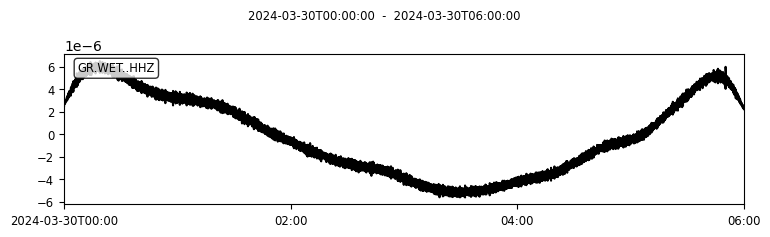

In [16]:
stx.plot();